In [1]:
import sys
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# To get functions to plot the band structure and hamiltonian
sys.path.append("../../../")
from periodiclas.tools.util import LASdata

In [3]:
# BNL* Reference values
BNLIP = -5.87
BNLEA =  -2.60

In [4]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10),
    'axes.titlesize':24
})

# Convergence of Band Gap with respect to number of k-points

In [55]:
nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
sns.set()
plt.figure()
plt.scatter(1/nk, bandgap, label='(8,8)',s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(4,4)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(2,2))', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)

plt.title('LAS-tPBE0 Band Gap Convergence Relative to $N_k$',fontsize=32)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0, 11)
plt.ylabel("Band Gap (eV)",fontsize=32)
plt.xlabel(r"$1/N_{k}$",fontsize=32)
plt.legend(loc='best', fontsize=30)
plt.annotate("C",(0.25, 10),c='black',size=40)
plt.tight_layout()
plt.savefig('PABandGapConvergenceforLAStPBE0withKpoints.png', dpi=dpi)
plt.close()

In [56]:
# LAS-tPBE
plt.figure()
sns.set()
nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]

plt.scatter(1/nk, bandgap, label='(8,8)', s=250)
plt.plot(1/nk, bandgap, linestyle='--',linewidth=4)


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(4,4)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(2,2)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)

plt.title('LAS-tPBE Band Gap Convergence Relative to $N_k$',fontsize=32)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0, 11)
plt.ylabel("Band Gap (eV)",fontsize=32)
plt.xlabel(r"$1/N_{k}$",fontsize=32)
plt.tight_layout()
plt.grid(True, linestyle='--')
plt.legend(loc='best', fontsize=32)
plt.annotate("B",(0.25, 10),c='black',size=40)
plt.tight_layout()
plt.savefig('PABandGapConvergenceforLAStPBEwithKpoints.png', dpi=dpi)
plt.close()

In [63]:
# LAS Band Gap

nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
sns.set()
plt.figure()
plt.scatter(1/nk, bandgap, label='(8,8)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(4,4)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(2,2)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)

plt.title('LASSI Band Gap Convergence Relative to $N_k$',fontsize=32)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0, 16)
plt.ylabel("Band Gap (eV)",fontsize=32)
plt.xlabel(r"$1/N_{k}$",fontsize=32)
plt.tight_layout()
plt.grid(True, linestyle='--')
plt.legend(loc='upper right', fontsize=32)
plt.annotate("A",(0.25, 14),c='black',size=40)
plt.tight_layout()
plt.savefig('PABandGapConvergenceforLASwithKpoints.png', dpi=dpi)
plt.close()

In [297]:
# Combined
plt.figure()


nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LASSI (8CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='solid')


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LASSI (4CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='solid')


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LASSI (2CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='solid')



nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LAS-tPBE0 (8CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='--')

nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LAS-tPBE0 (4CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='--')

nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LAS-tPBE0 (2CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='--')


nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LAS-tPBE (8CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='dashdot')


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LAS-tPBE (4CUC)',s=150)
plt.plot(1/nk, bandgap, linestyle='dashdot')


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='LAS-tPBE (2CUC)', s=150)
plt.plot(1/nk, bandgap, linestyle='dashdot')

plt.ylim(0, 15)
plt.xticks()
plt.yticks()
plt.ylabel("Band Gap (eV)")
plt.xlabel(r"$^{\frac{1}{N_{k}}}$")
plt.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.savefig('PABandGapConvergenceCombinedwithKpoints.png', dpi=dpi)
plt.close()


# Convergence of IP For Different Unit Cell Sizs

In [298]:
plt.figure()

nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[0] for nC in nCT]

plt.scatter(1/nk, bandgap, label='8CUC', s=150)
plt.plot(1/nk, bandgap, linestyle='--')


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[0] for nC in nCT]
plt.scatter(1/nk, bandgap, label='4CUC', s=150)
plt.plot(1/nk, bandgap, linestyle='--')


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[0] for nC in nCT]
plt.scatter(1/nk, bandgap, label='2CUC', s=150)
plt.plot(1/nk, bandgap, linestyle='--')

plt.title('LAS-tPBE0 IP For Different Unit Cell Sizes Relative to $N_k$')
plt.xticks()
plt.yticks()
plt.ylim(0, 11)
plt.ylabel("IP (eV)")
plt.xlabel(r"$^{\frac{1}{N_{k}}}$")
plt.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.savefig('PAIPConvergencewithKpoints.png', dpi=dpi)
plt.close()

# Convergence of EA For Different Unit Cell Sizs

In [299]:
plt.figure()

nCT = [16, 32, 64]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[1] for nC in nCT]

plt.scatter(1/nk, bandgap, label='8CUC', s=150)
plt.plot(1/nk, bandgap, linestyle='--')


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='4CUC', s=150)
plt.plot(1/nk, bandgap, linestyle='--')


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='2CUC', s=150)
plt.plot(1/nk, bandgap, linestyle='--')

plt.title('LAS-tPBE0 EA For Different Unit Cell Sizes Relative to $N_k$', fontsize=20)

plt.ylim(-3, 3)
plt.ylabel("EA (eV)")
plt.xticks()
plt.yticks()
plt.xlabel(r"$^{\frac{1}{N_{k}}}$",fontsize=30)
plt.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.savefig('PAEAConvergencewithKpoints.png', dpi=dpi)
plt.close()

# PAChain LAS Hamiltonian

In [300]:
def get_hamiltonian(civec, energy,diag_sub=False):
    '''
    LASSI Hamiltonian
    args:
        civec:
        energy:
    return:
        hmat:
    '''
    nstates = civec.shape[0]
    hmat = np.zeros((nstates, nstates))

    for i in range(nstates):
        hmat += np.outer(civec[:,i],civec[:,i]) * energy[i]

    if diag_sub:
        hmat = hmat - np.diag(np.diag(hmat))
    else:
        # Remove the noise
        minval = -10
        for i in range(nstates):
            hmat[i][np.where(hmat[i] != 0)] = np.log10(np.abs(hmat[i][np.where(hmat[i] != 0)]))
            hmat[i][np.where(hmat[i] < minval)] = minval #minimum shown value
            hmat[i][np.where(hmat[i] == 0)] = minval #arbitrary

    return hmat


def plot_hamiltonian(hmat, figname, cmap="magma", dpi=300, title='LASSI Hamiltonian'):
    '''
    Plot the Hamilotnian
    '''
    nstates = hmat.shape[0]

    plt.figure()
   
    ax = sns.heatmap(hmat,
            cmap=cmap,
            cbar_kws={'label': r"$\log_{10}(|H_{ij}|)$"},)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    cbar.set_label(r"$\log_{10}(|H_{ij}|)$",fontsize=20)

    ax.tick_params(axis='x', bottom=False, top=False)
    ax.tick_params(axis='y', left=False, right=False)
    ax.set_xticks(ticks=np.arange(0, nstates, 4))
    ax.set_yticks(ticks=np.arange(0, nstates, 4))
    ax.set_xticklabels(np.arange(0, nstates, 4),
            rotation=0, ha="center", rotation_mode='anchor')
    ax.set_yticklabels(np.arange(0, nstates, 4),
            rotation=0, ha="center", rotation_mode='anchor')

    block_centers = [
            (1 + (nstates // 4), 2 + (nstates // 2)),
            (1 + (3 * nstates // 4), nstates // 2-0.5)]
    block_labels = ["N-1 States", "N+1 States"]

    for (x, y), label in zip(block_centers, block_labels):
        plt.text(x, y, label, fontsize=24, ha='center', va='top', color='white')
    ax.yaxis.set_tick_params(pad=15)
    plt.xticks()
    plt.yticks()
    plt.title(title)
    plt.tight_layout()
    plt.savefig(figname+'ham.png', dpi=dpi, bbox_inches='tight')
    return plt
    


In [301]:
# Plot the LASSI Hamiltonian
nCfrag = 4
nCT = 64
pklfile = prntfld + f'/LAS/{nCfrag}CUC/PAChain.{nCfrag}.{nCT}.pkl'

lasdata = LASdata(pkl_fn=pklfile, pct_pdft=0)

hmat = get_hamiltonian(lasdata.civecs, lasdata.energies_lassi)
plot_hamiltonian(hmat, 'PAChainLASHamiltonian.', cmap="viridis", dpi=dpi)
plt.close()

In [302]:
# Plot the LASSI-tPBE Hamiltonian
nCfrag = 4
nCT = 64
pklfile = prntfld + f'/LAS/{nCfrag}CUC/PAChain.{nCfrag}.{nCT}.pkl'

lasdata = LASdata(pkl_fn=pklfile, pct_pdft=1)

hmat = get_hamiltonian(lasdata.civecs, lasdata.energies_lassipdft)
plot_hamiltonian(hmat, 'PAChainLAStPBEHamiltonian.', cmap="viridis", dpi=dpi, title='LAS-tPBE Hamiltonian')
plt.close()

# Extrapolation of IP, EA for LASSI, LAS-tPBE and LAS-tPBE0

In [303]:
plt.figure()

nCT = [32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])

nmonomers = np.array([16, 32, 64])
one_over_nmonomer = (1/nmonomers).reshape(-1, 1)

IP = [getBand(nCfrag, nC, pct_pdft=0)[0] for nC in nCT]
plt.scatter(one_over_nmonomer, IP, label='LASSI IP', s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, IP)
x_fit = np.linspace(0, max(one_over_nmonomer), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, linestyle="--", label="LASSI IP Fit")

EA = [getBand(nCfrag, nC, pct_pdft=0)[1] for nC in nCT]
plt.scatter(one_over_nmonomer, EA, label='LASSI EA',s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, EA)
x_fit = np.linspace(0, max(1/nmonomers), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, linestyle="--", label="LASSI EA Fit")


IP = [getBand(nCfrag, nC, pct_pdft=0.75)[0] for nC in nCT]
plt.scatter(one_over_nmonomer, IP, label='LAS-tPBE0 IP',s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, IP)
x_fit = np.linspace(0, max(one_over_nmonomer), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
print("LAS-tPBE0 IP:", model.intercept_)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE0 IP Fit")

EA = [getBand(nCfrag, nC, pct_pdft=0.75)[1] for nC in nCT]
plt.scatter(one_over_nmonomer, EA, label='LAS-tPBE0 EA', s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, EA)
x_fit = np.linspace(0, max(1/nmonomers), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE0 EA Fit")
print("LAS-tPBE0 EA:", model.intercept_)



IP = [getBand(nCfrag, nC, pct_pdft=1)[0] for nC in nCT]
plt.scatter(one_over_nmonomer, IP, label='LAS-tPBE IP',s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, IP)
x_fit = np.linspace(0, max(one_over_nmonomer), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE IP Fit")

EA = [getBand(nCfrag, nC, pct_pdft=1)[1] for nC in nCT]
plt.scatter(one_over_nmonomer, EA, label='LAS-tPBE EA',s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, EA)
x_fit = np.linspace(0, max(1/nmonomers), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE EA Fit")

plt.title("Extrapolation to Thermodynamic Limit")
plt.ylim(-3, 15)
plt.xticks()
plt.yticks()
plt.ylabel("IP/EA (eV)")
plt.xlabel(r"$\frac{1}{N}$")
plt.legend(bbox_to_anchor=(1, 1), fontsize=20)
plt.tight_layout()
plt.savefig('PAChainExtrapolationtoTDL.png', dpi=dpi)
plt.close()

LAS-tPBE0 IP: 5.658714144129217
LAS-tPBE0 EA: 2.3146014019251977


In [304]:
# Extrapolation with resepect to CHCH Monomers

plt.figure()

nCT = [32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])

nmonomers = np.array([16, 32, 64])
one_over_nmonomer = (1/nmonomers).reshape(-1, 1)

IP = [getBand(nCfrag, nC, pct_pdft=0.75)[0] for nC in nCT]
plt.scatter(one_over_nmonomer, IP, label='LAS-tPBE0 IP', s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, IP)
x_fit = np.linspace(0, max(one_over_nmonomer), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
print("LAS-tPBE0 IP:", model.intercept_)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE0 IP Fit")

EA = [getBand(nCfrag, nC, pct_pdft=0.75)[1] for nC in nCT]
plt.scatter(one_over_nmonomer, EA, label='LAS-tPBE0 EA', s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, EA)
x_fit = np.linspace(0, max(1/nmonomers), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE0 EA Fit")
print("LAS-tPBE0 EA:", model.intercept_)
plt.xticks()
plt.yticks()
plt.ylabel("IP (eV)")
plt.xlabel(r"$^{\frac{1}{N_{k}}}$")
plt.close()

LAS-tPBE0 IP: 5.658714144129217
LAS-tPBE0 EA: 2.3146014019251977


LAS-tPBE0 IP: 5.658714144129217
LAS-tPBE0 EA: 2.3146014019251977


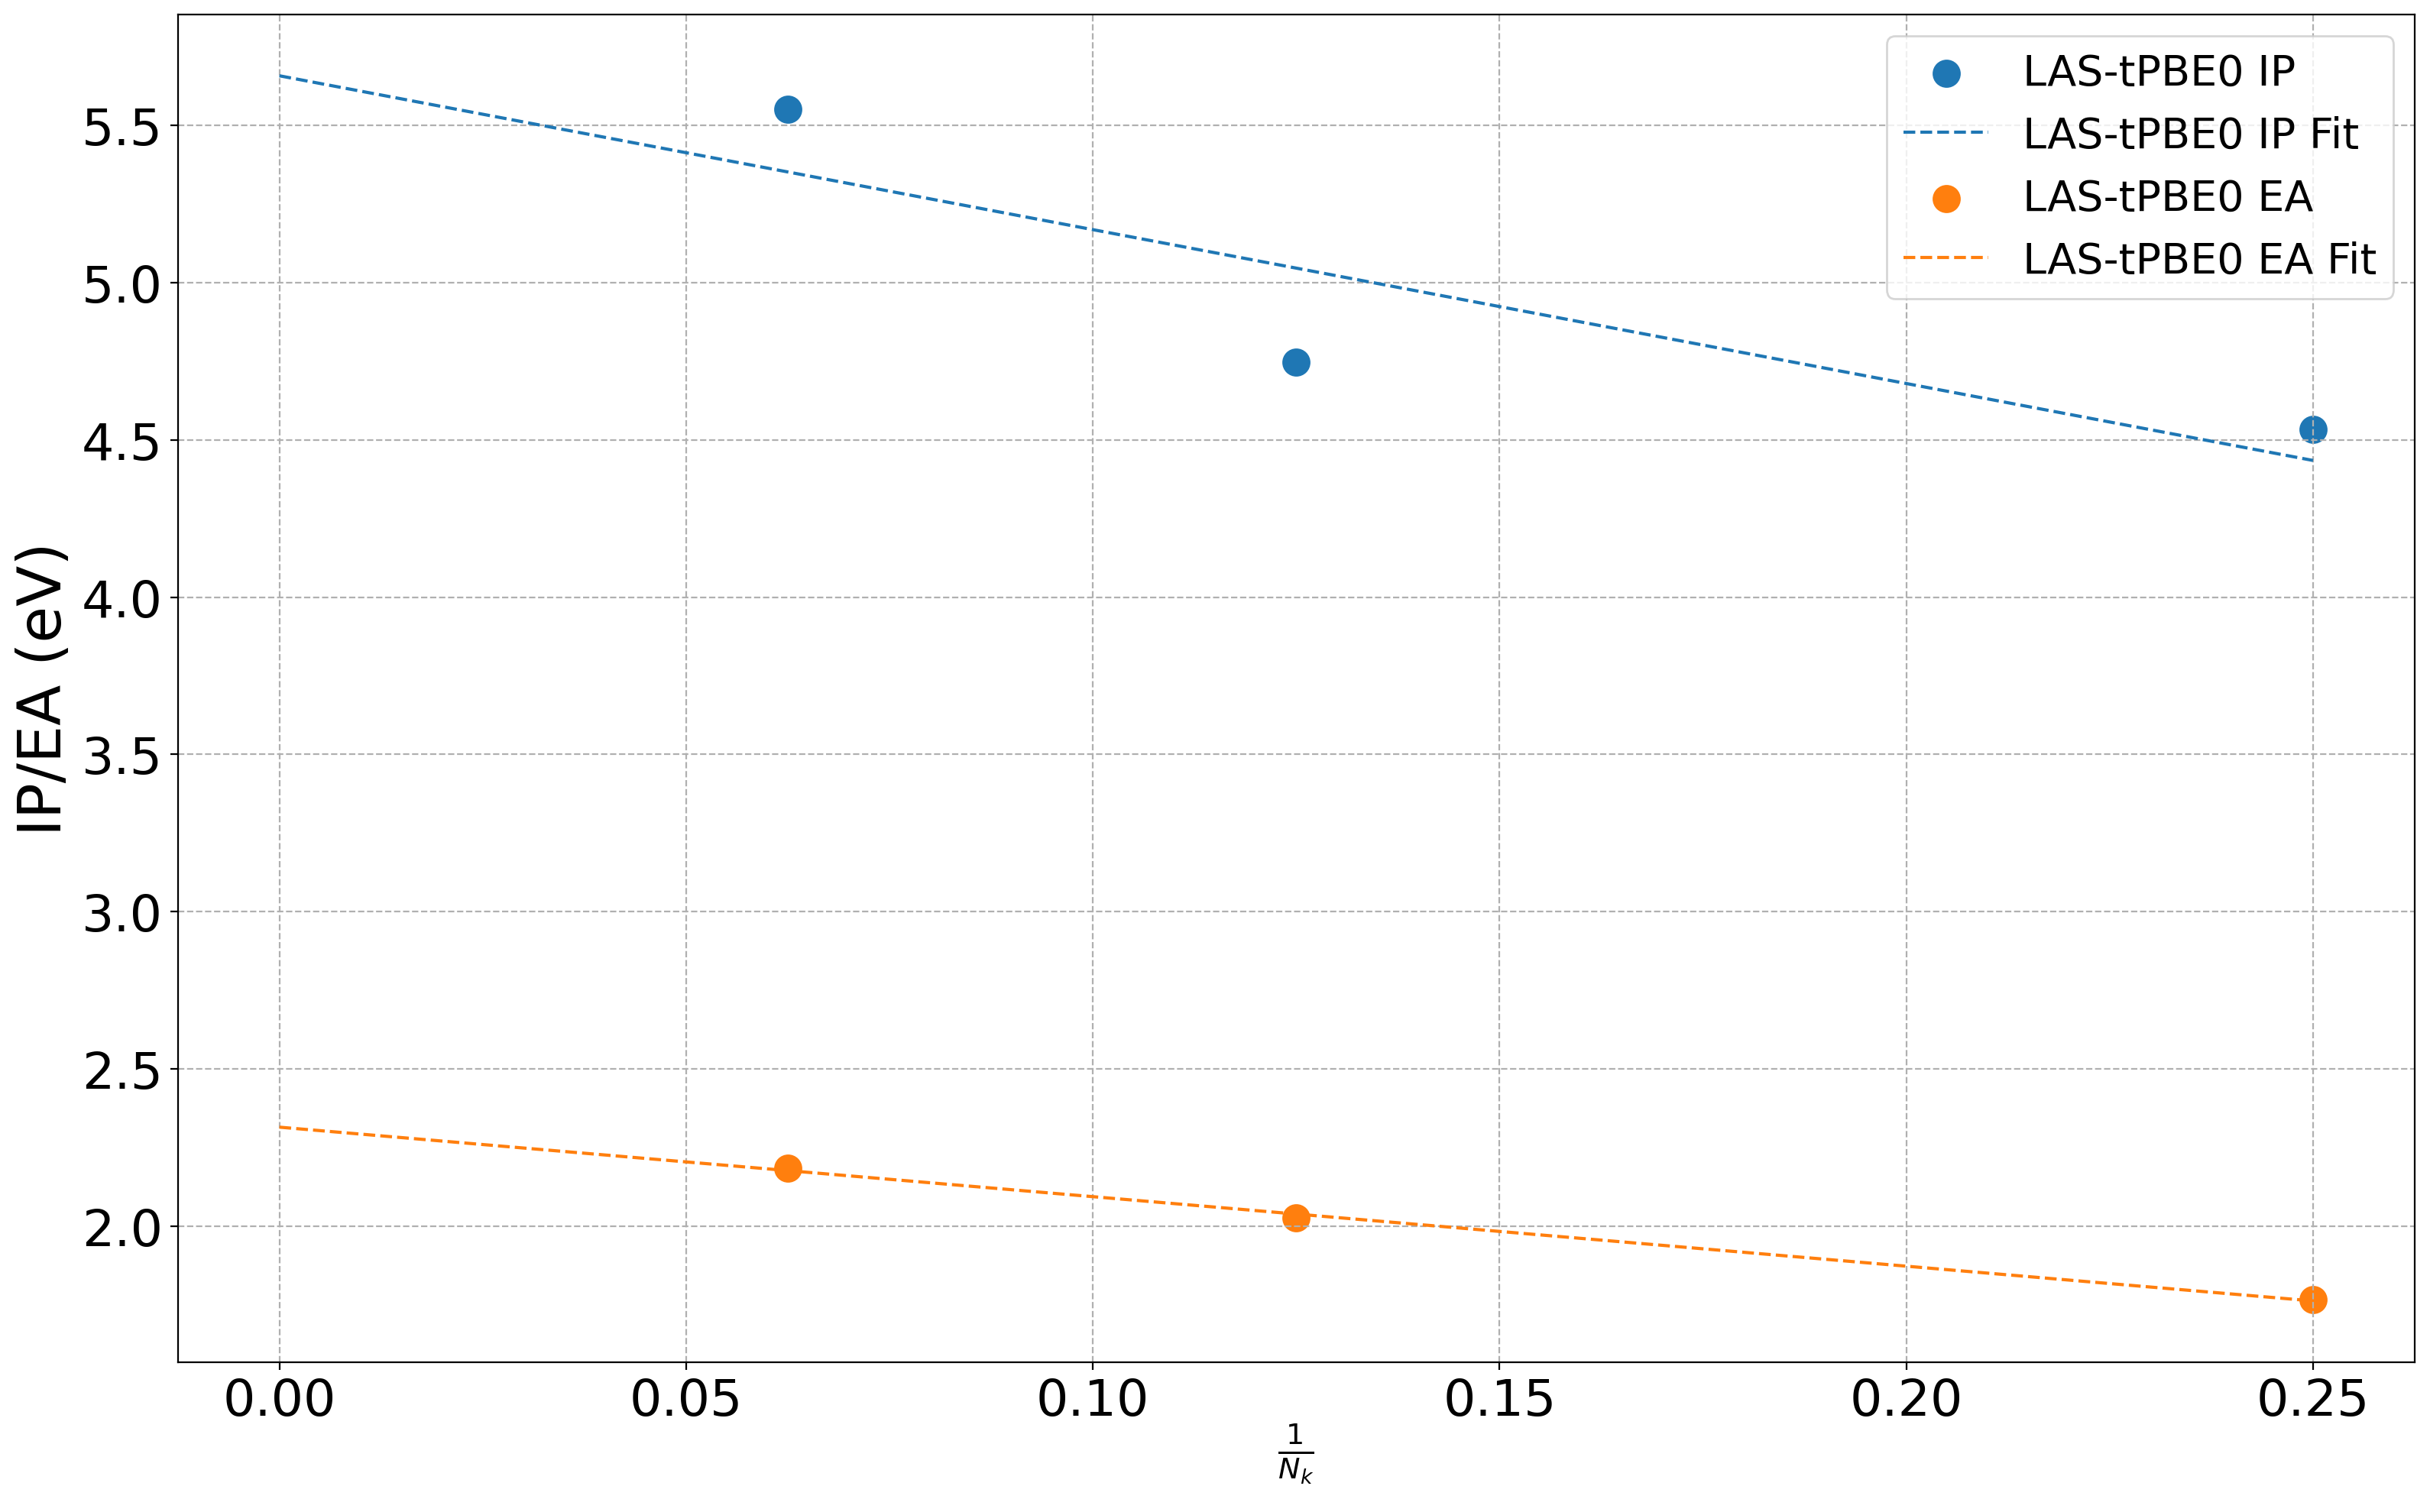

In [305]:
# Extrapolation with resepect to N_k

plt.figure()

nCT = [32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])

one_over_nmonomer = (1/nk).reshape(-1, 1)

IP = [getBand(nCfrag, nC, pct_pdft=0.75)[0] for nC in nCT]
plt.scatter(one_over_nmonomer, IP, label='LAS-tPBE0 IP', s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, IP)
x_fit = np.linspace(0, max(one_over_nmonomer), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
print("LAS-tPBE0 IP:", model.intercept_)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE0 IP Fit")

EA = [getBand(nCfrag, nC, pct_pdft=0.75)[1] for nC in nCT]
plt.scatter(one_over_nmonomer, EA, label='LAS-tPBE0 EA',s=150)
model = LinearRegression()
model.fit(one_over_nmonomer, EA)
x_fit = np.linspace(0, max(one_over_nmonomer), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)
plt.plot(x_fit, y_fit, linestyle="--", label="LAS-tPBE0 EA Fit")
print("LAS-tPBE0 EA:", model.intercept_)
plt.xticks()
plt.yticks()
plt.legend(loc='best', fontsize=20)
plt.ylabel("IP/EA (eV)")
plt.xlabel(r"$^{\frac{1}{N_{k}}}$")
plt.tight_layout()
# plt.close()

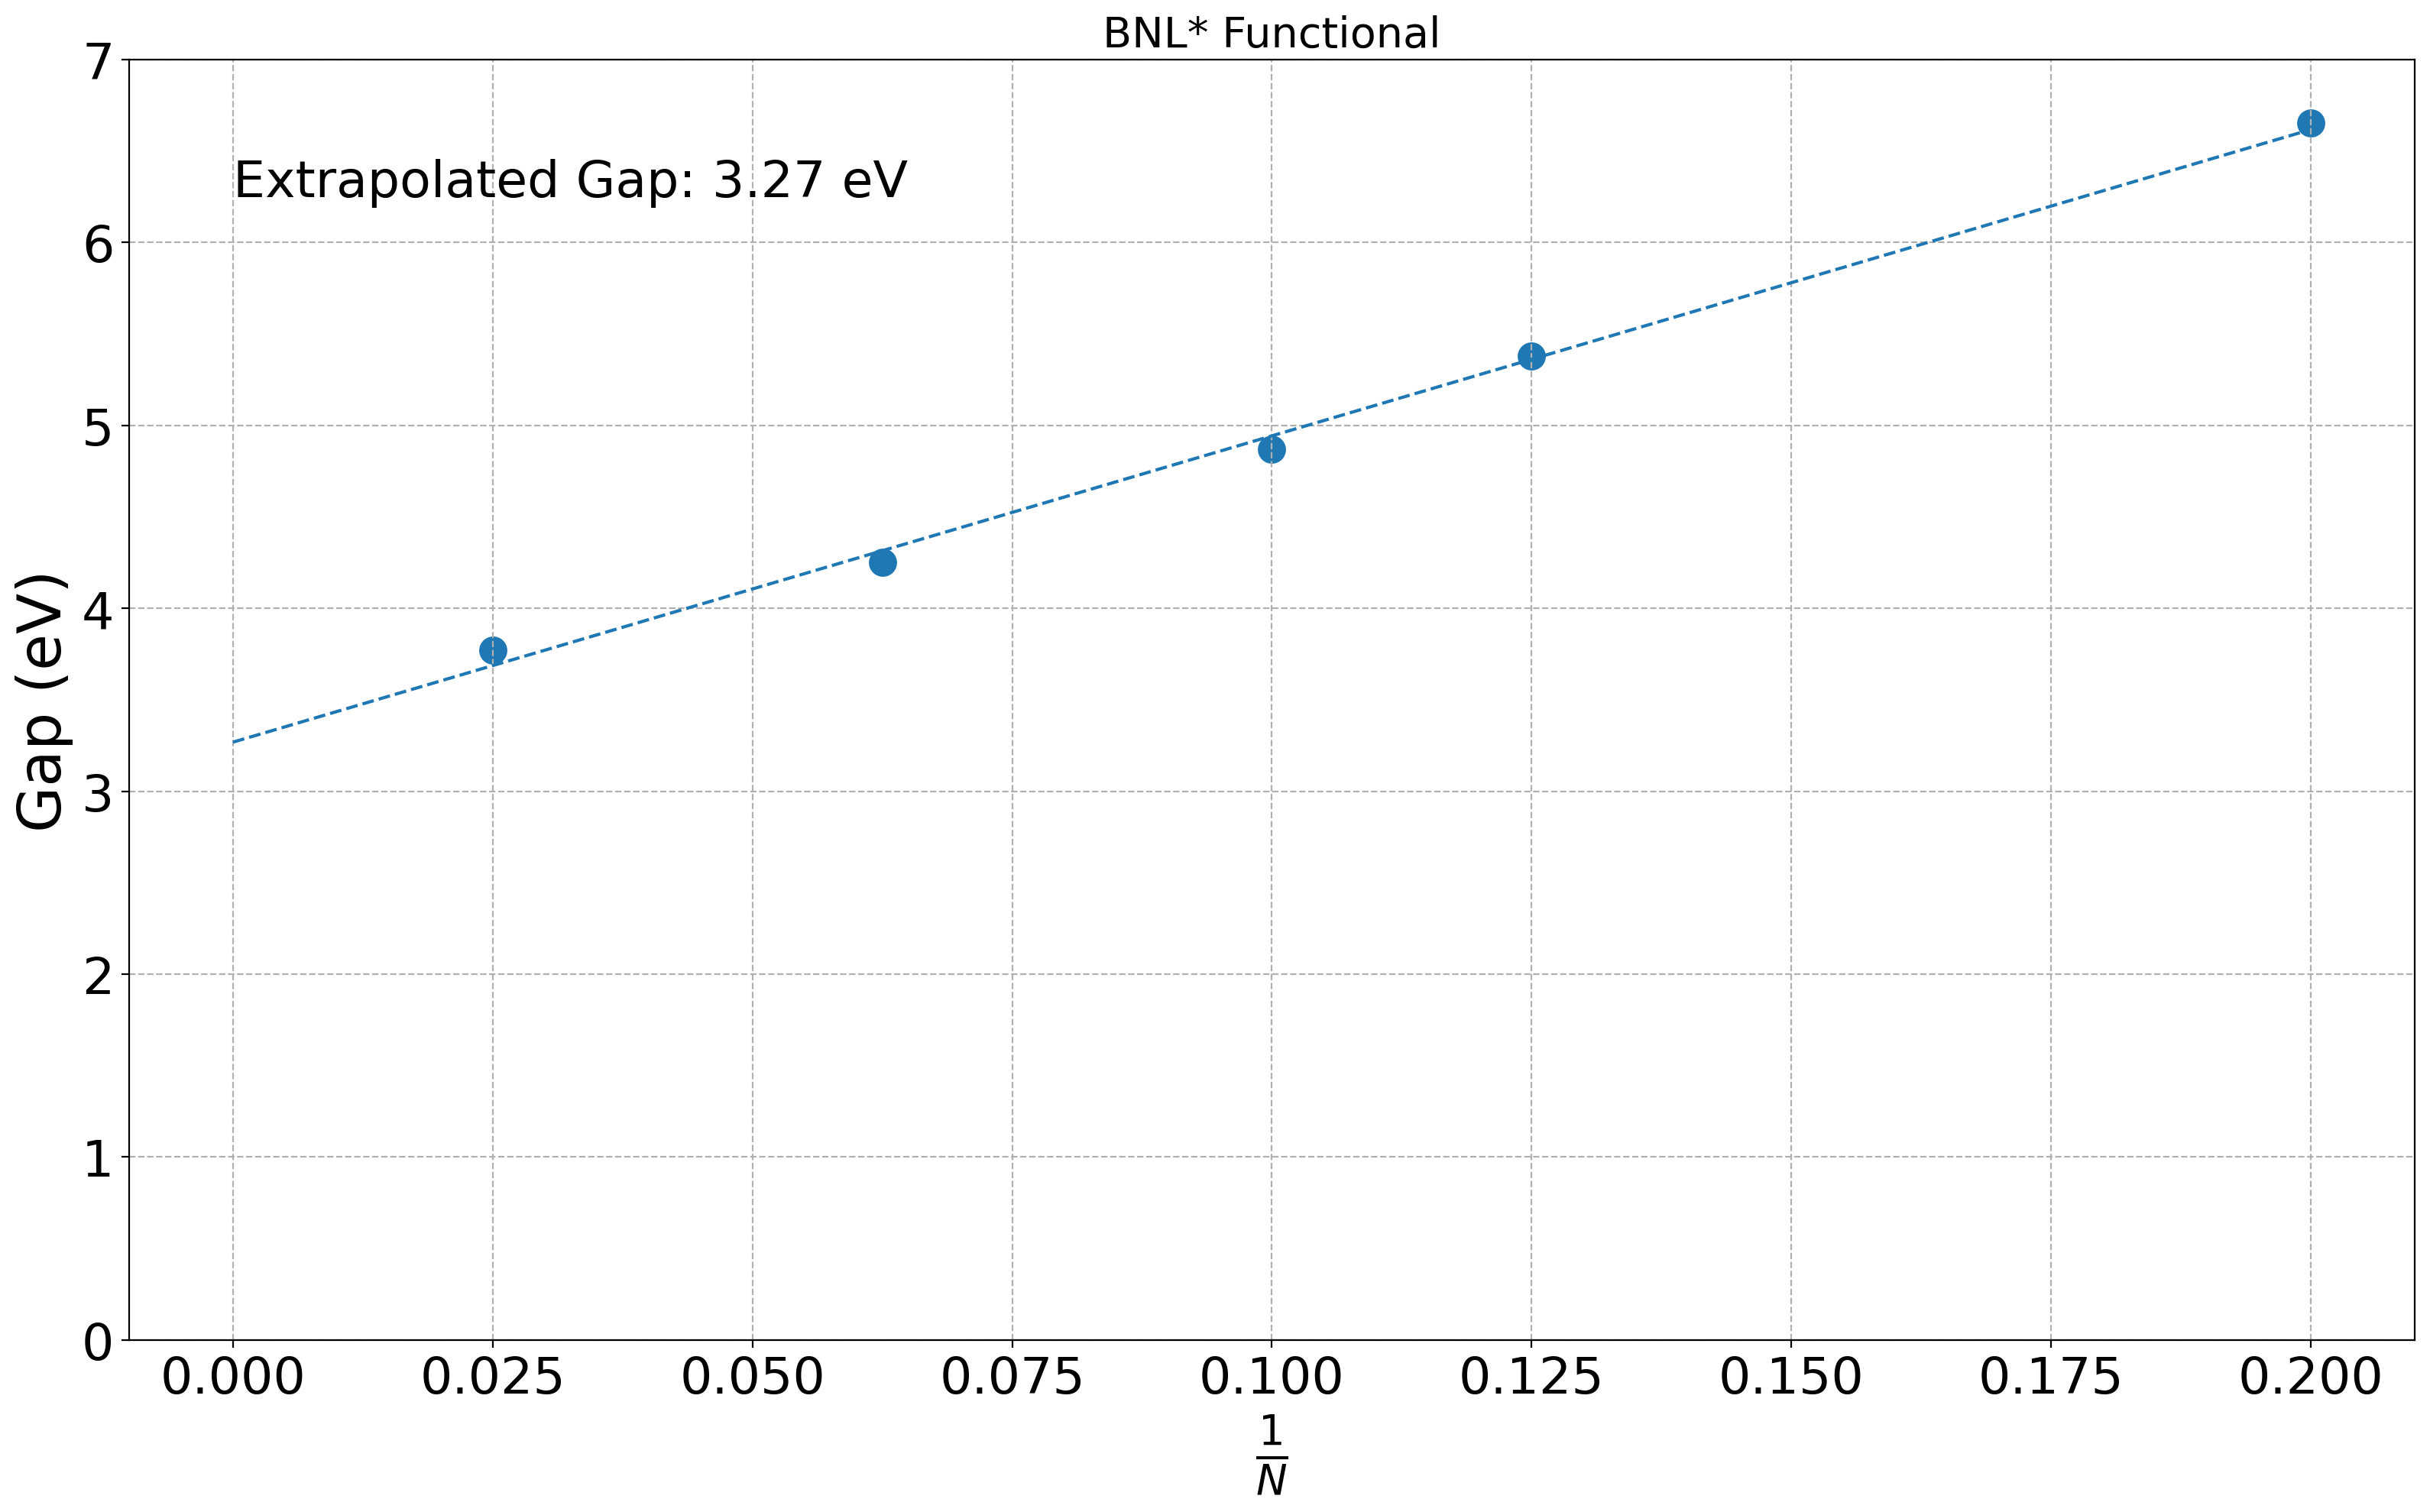

In [306]:
#Data Taken from SI of https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.186401
beginat = 3
x = 1/np.array([1,2,3,5,8,10,16,40])[beginat:]
y = np.array([11.02,9.48,8.41,6.65,5.38,4.87,4.25,3.77])[beginat:]
plt.figure()
plt.scatter(x,y, s=150)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x[:,None],y[:,None])
m, b = model.coef_[0], model.intercept_[0] 
x = np.arange(0,x.max(),0.0001)
y = m*x + b
plt.plot(x,y,linestyle="--")
plt.xlabel(r"$\frac{1}{N}$")
plt.ylabel("Gap (eV)")
plt.ylim(0,7)
plt.xticks()
plt.yticks()
plt.title("BNL* Functional", fontsize=20)
plt.annotate(f"Extrapolated Gap: {np.round(b,2)} eV",(0,6.25), fontsize=24)
plt.tight_layout()
plt.savefig("ExtrapolatedBNLGap.png",dpi=dpi)
# plt.close()